In [11]:
#-------------------------------------------------------------------------------
# Define all required libraries, routines, and modules
#-------------------------------------------------------------------------------
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import sys
import mpl_toolkits.basemap
import os
import csv

#-------------------------------------------------------------------------------
# Define all required sub-libraries, sub-routines, and sub-modules
#-------------------------------------------------------------------------------
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
from matplotlib.patches import Polygon


In [73]:
# For inline plotting
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [65]:
#=========================================================================#
#=                  Set file input/output directories                    =#
#=========================================================================#
plotdir    = '/Volumes/Black_box/Data/PLOTS/USeast-age/validate/';
ROMSGSfile = '/Volumes/Black_box/Data/USeast/Data/GS_position/'+\
             'ROMS_GS_lats.txt';
Drinkwater = '/Volumes/Black_box/Data/USeast/Data/GS_position/'+\
             'Drinkwater_GS.txt';
grid_file  = '/Volumes/Black_box/Data/USeast/Data/grd/USeast-grid.nc'


In [129]:
#=========================================================================#
#=                      Load ROMS grid information                       =#
#=========================================================================#
print 'Ingesting data from file %s ...' % (grid_file)

grid_data=Dataset(grid_file,mode='r')
mask= grid_data.variables['mask_rho' ][:]
h    = grid_data.variables['h'        ][:]
lon =grid_data.variables['lon_rho'    ][:]
lat =grid_data.variables['lat_rho'    ][:]
grid_data.close()


Ingesting data from file /Volumes/Black_box/Data/USeast/Data/grd/USeast-grid.nc ...


In [130]:
#=========================================================================#
#=                        Load ROMS GS Positions                         =#
#=========================================================================#
ROMS_lon=lon[289,201:402]

f=open(ROMSGSfile,'r')
reader=csv.reader(f)

ROMS_mean_lat=np.zeros(shape=(201,))
ROMS_std_lat =np.zeros(shape=(201,))
i=0
for row in reader:
    ROMS_mean_lat[i]=float(row[0])
    ROMS_std_lat [i]=float(row[1])
    i+=1

f.close()

In [124]:
lon.shape

(482, 376)

In [137]:
#=========================================================================#
#=                        Load ROMS GS Positions                         =#
#=========================================================================#

f=open(Drinkwater,'r')
reader=csv.reader(f)

Drink_lon     =np.zeros(shape=(26,))
Drink_mean_lat=np.zeros(shape=(26,))
Drink_std_lat =np.zeros(shape=(26,))
i=0
for row in reader:
    Drink_lon[     i]=float(row[0])
    Drink_std_lat[ i]=float(row[1])
    Drink_mean_lat[i]=float(row[2])
    i+=1

f.close()



In [109]:
Drink_lon

array([-75., -74., -73., -72., -71., -70., -69., -68., -67., -66., -65.,
       -64., -63., -62., -61., -60., -59., -58., -57., -56., -55., -54.,
       -53., -52., -51., -50.])

Plotting data.


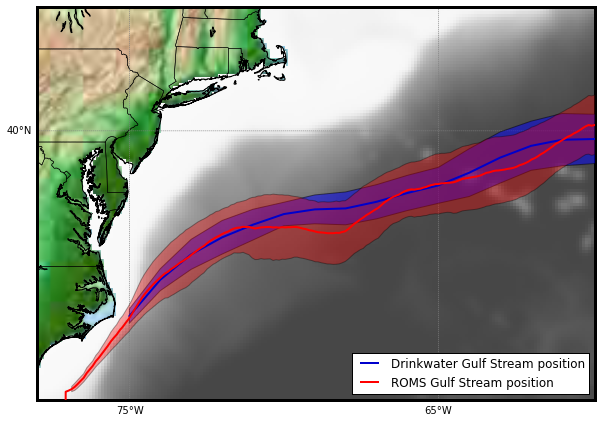

In [154]:
#-------------------------------------------------------------------------------
# Plot Data using Basemap mercator projection
#-------------------------------------------------------------------------------
print 'Plotting data.'

fig=plt.figure(num=None, figsize=(10, 10), dpi=300, facecolor='w')
ax=plt.subplot(111)
m=Basemap(projection='merc',llcrnrlat=33,urcrnrlat=43,\
          llcrnrlon=-78,urcrnrlon=lon.max(),lat_ts=20,resolution='f')

# Draw a thick border around the whole map
m.drawmapboundary(fill_color='white',linewidth=3)

# Plot Data
xi, yi = m(lon,lat)
cs = m.pcolormesh(xi,yi,-h,cmap=cm.gray,vmin=-7000, vmax=150)

# Plot Drinkwater GS Data
xi, yi1 = m(Drink_lon,Drink_mean_lat+Drink_std_lat)
xi, yi2 = m(Drink_lon,Drink_mean_lat-Drink_std_lat)
ax.fill_between(xi, yi1, yi2, facecolor='blue', alpha=0.5,zorder=4)

xi, yi = m(Drink_lon,Drink_mean_lat)
#ax.plot(xi,yi,color=[0.6,0.6,0,1],linewidth=2,zorder=4)
ax.plot(xi,yi,color=[0,0,0.8,1],linewidth=2,zorder=4,label='Drinkwater Gulf Stream position')

# Plot ROMS GS Data
aa=ROMS_lon[26::]
bb=ROMS_mean_lat[26::]+ROMS_std_lat[26::]
xi,yi1 = m(aa,bb)
cc=ROMS_mean_lat[26::]-ROMS_std_lat[26::]
xi,yi2 = m(aa,cc)
ax.fill_between(xi,yi1,yi2,facecolor='red',alpha=0.35,zorder=4)

xi, yi = m(ROMS_lon,ROMS_mean_lat)
ax.plot(xi,yi,color='r',linewidth=2.0,zorder=4,label='ROMS Gulf Stream position')

#fig, ax = plt.subplots(1)
#ax.plot(t, mu1, lw=2, label='mean population 1', color='blue')
#ax.plot(t, mu1, lw=2, label='mean population 2', color='yellow')
#ax.fill_between(t, mu1+sigma1, mu1-sigma1, facecolor='blue', alpha=0.5)
#ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='yellow', alpha=0.5)
#ax.set_title('random walkers empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='lower right')

# Contour depths (but first mask Pacific)
h=np.ma.array(h,mask=1.0-mask)

# Add Grid Lines
m.drawparallels(np.arange(0.,90.,10.), labels=[1,0,0,0],\
                fontsize=10, linewidth=0.75, color='.5')
m.drawmeridians(np.arange(-105.,-35.,10.), labels=[0,0,0,1],\
                fontsize=10, linewidth=0.75, color='.5')

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.etopo()

# Save figure to file
#print 'Saving figure to file %s ' % plot_file
plot_file=plotdir+'GS_positions.png'
plt.savefig(plot_file,dpi=300,bbox_inches='tight')
#plt.show()


In [128]:
ROMS_lon.shape

(175,)